**Movie recommendation**


Movie recommendation systems are algorithms designed to suggest movies to users based on their preferences and past behaviors. These systems are widely used in streaming platforms like Netflix, Hulu, and Amazon Prime Video.<br> 
**Key Approaches in Movie Recommendation Systems:**<br>
&nbsp;&nbsp;&nbsp;&nbsp;1.Collaborative Filtering<br>
&nbsp;&nbsp;&nbsp;&nbsp;2.Content-Based Filtering<br>
&nbsp;&nbsp;&nbsp;&nbsp;3.Hybrid Methods<br>
&nbsp;&nbsp;&nbsp;&nbsp;4.Matrix Factorization<br>
&nbsp;&nbsp;&nbsp;&nbsp;5.Deep Learning<br>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [8]:
movies=pd.read_csv("C:\\Users\\kiruthik\\OneDrive\\Desktop\\bharath intern\\task2\\movies.csv")
ratings=pd.read_csv("C:\\Users\\kiruthik\\OneDrive\\Desktop\\bharath intern\\task2\\ratings.csv")
movies.info()
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [26]:
movies.describe()

,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000


In [10]:
ratings.head()


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [25]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [11]:
#since using the genre column won't do much, let us drop the column and make use of only the movieid and movie name
movies.drop(['genres'], axis=1, inplace=True)
df = pd.merge(movies, ratings, on='movieId')
df = df.iloc[:1000000]

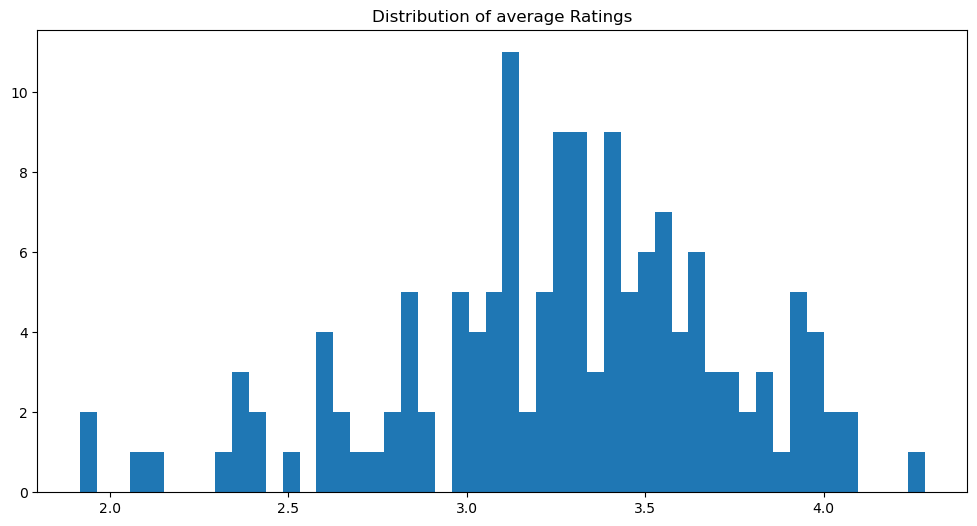

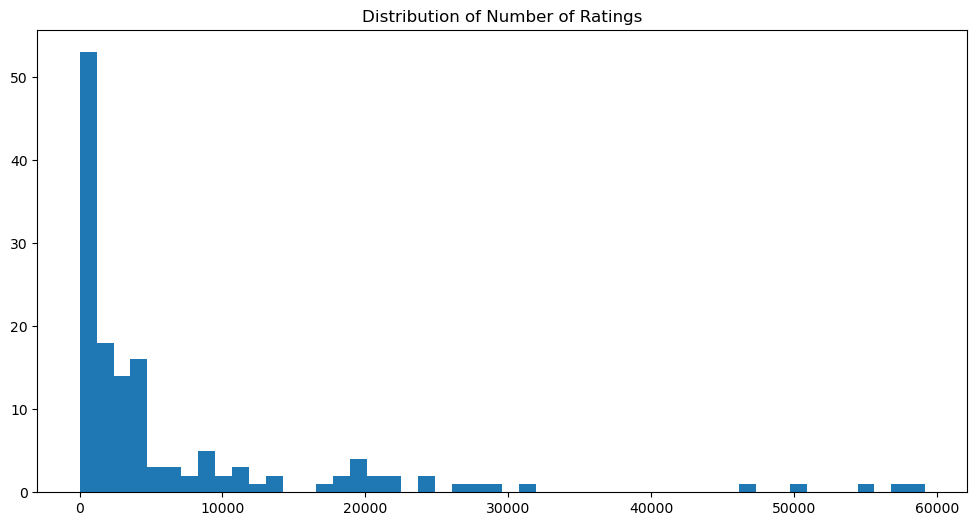

In [12]:
ratings_summary=df.groupby('title').agg({'rating':['mean','count']})
ratings_summary.columns=['average_rating','number_of_ratings']

plt.figure(figsize=(12,6))
plt.hist(ratings_summary['average_rating'],bins=50)
plt.title('Distribution of average Ratings')
plt.show()

plt.figure(figsize=(12,6))
plt.hist(ratings_summary['number_of_ratings'], bins=50)
plt.title('Distribution of Number of Ratings')
plt.show()

In [27]:
pivot_table = df.pivot_table(index='userId', columns='title', values='rating')
pivot_table.head(5)


title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pivot_table.shape

(138544, 144)

In [31]:
def Recommend_Movies(movie, pivot_table=pivot_table):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)
    return similarity_with_other_movies.sort_values(ascending=False).head()

In [32]:
print(Recommend_Movies('Toy Story (1995)'))

title
Toy Story (1995)                 1.000000
Shadows (Cienie) (1988)          0.592258
Across the Sea of Time (1995)    0.488717
Angela (1995)                    0.476685
Guardian Angel (1994)            0.456041
dtype: float64


Building a Neural network with Tensorflow

In [17]:
pivot_table.fillna(0,inplace=True)
X=pivot_table.values
Y=X.copy()
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [19]:
"""
Creates a neural network model to increase the performance. the numbers(128,64) represents the number of neurons in each layer and relu stands for, 
rectified linear unit.
"""
model=Sequential([
    Dense(128,activation='relu',input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(X_scaled.shape[1],activation='linear')
])
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_scaled,Y,epochs=5,batch_size=128,validation_split=0.2)

C:\Users\kiruthik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.5000 - val_loss: 0.2141
Epoch 2/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2614 - val_loss: 0.1639
Epoch 3/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2288 - val_loss: 0.1462
Epoch 4/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2104 - val_loss: 0.1330
Epoch 5/5
866/866 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.2029 - val_loss: 0.1250


In [20]:
def recommend_with_nn(user_id, pivot_table=pivot_table, model=model):
    user_ratings = pivot_table.loc[user_id].values.reshape(1, -1)
    user_ratings_scaled = scaler.transform(user_ratings)
    predicted_ratings = model.predict(user_ratings_scaled).flatten()
    
    # Recommend top 5 movies
    recommended_movies = np.argsort(predicted_ratings)[-5:][::-1]
    movie_titles = pivot_table.columns[recommended_movies]
    
    return movie_titles


In [23]:
#Using 1 will show error as there is no user_id as 1. hence, try using user_id that are present in the next code cell.
print(recommend_with_nn(2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Index(['Braveheart (1995)', 'Toy Story (1995)', 'Usual Suspects, The (1995)',
       'Muppet Treasure Island (1996)', 'Taxi Driver (1976)'],
      dtype='object', name='title')


In [24]:
print(pivot_table.index)

Index([     2,      3,      4,      5,      7,      8,      9,     10,     12,
           13,
       ...
       162531, 162533, 162534, 162535, 162536, 162537, 162538, 162539, 162540,
       162541],
      dtype='int64', name='userId', length=138544)
